## 2. Graph theory indices

In [23]:
%load_ext autoreload
%autoreload 2

In [24]:
import networkx as nx

from graph_theory_indices import GraphTheoryIndices as GTI

In [4]:
open_eyes_path = 'data/S002/S002R01.edf'
closed_eyes_path = 'data/S002/S002R02.edf'

In [5]:
open_eyes_gti = GTI(open_eyes_path)

Extracting EDF parameters from C:\Users\paolo\dev\data_science\BIO\Bioinf2\data\S002\S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF data loaded!


In [6]:
closed_eyes_gti = GTI(closed_eyes_path)

Extracting EDF parameters from C:\Users\paolo\dev\data_science\BIO\Bioinf2\data\S002\S002R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF data loaded!


### 2.1 (mandatory)
Compute binary global (average clustering coefficient, average path length) and local (degree, in/out-degree) graph indices. List the highest 10 channels for local indices.

#### Open eyes

In [78]:
open_eyes_gti.compute_connectivity(freq=10, threshold=0.2)

avg_cl_coef, avg_path_len = open_eyes_gti.compute_global_indices()
print("##### BINARY GLOBAL INDICES #####\n")
print("Average Clustering Coefficient: %.3f" % (avg_cl_coef))
print("Average Path Length: %.3f" % (avg_path_len))

degree, in_degree, out_degree = open_eyes_gti.compute_local_indices()
print("\n##### BINARY LOCAL INDICES #####\n")
print("Degree (first 10): \t", degree[:10], "\n")
print("In-Degree (first 10): \t", in_degree[:10], "\n")
print("Out-Degree (first 10): \t", out_degree[:10], "\n")

##### BINARY GLOBAL INDICES #####

Average Clustering Coefficient: 0.279
Average Path Length: 2.533
##### BINARY LOCAL INDICES #####

Degree (first 10): 	 [('Af7', 45), ('T7', 43), ('Iz', 42), ('Oz', 41), ('Cp6', 39), ('P4', 38), ('F7', 37), ('C4', 34), ('Cp1', 34), ('Af8', 34)] 

In-Degree (first 10): 	 [('Cp6', 32), ('P4', 30), ('Iz', 30), ('C4', 29), ('Oz', 29), ('P7', 26), ('Cp1', 25), ('C3', 24), ('F2', 23), ('Po3', 23)] 

Out-Degree (first 10): 	 [('T7', 43), ('Af7', 38), ('Af8', 32), ('F7', 30), ('Fp1', 26), ('Fp2', 23), ('F8', 21), ('Fpz', 20), ('Af4', 20), ('F5', 20)] 



#### Closed eyes

In [77]:
closed_eyes_gti.compute_connectivity(freq=10, threshold=0.2, method="DTF")

avg_cl_coef, avg_path_len = closed_eyes_gti.compute_global_indices()
print("##### BINARY GLOBAL INDICES #####\n")
print("Average Clustering Coefficient: %.3f" % (avg_cl_coef))
print("Average Path Length: %.3f" % (avg_path_len))

degree, in_degree, out_degree = closed_eyes_gti.compute_local_indices()
print("\n##### BINARY LOCAL INDICES #####\n")
print("Degree (first 10): \t", degree[:10], "\n")
print("In-Degree (first 10): \t", in_degree[:10], "\n")
print("Out-Degree (first 10): \t", out_degree[:10], "\n")

##### BINARY GLOBAL INDICES #####

Average Clustering Coefficient: 0.276
Average Path Length: 2.115
##### BINARY LOCAL INDICES #####

Degree (first 10): 	 [('Iz', 49), ('Oz', 45), ('Poz', 44), ('Po4', 44), ('T7', 37), ('Po8', 37), ('Fc3', 36), ('C4', 36), ('O2', 36), ('Af7', 34)] 

In-Degree (first 10): 	 [('Iz', 33), ('C4', 30), ('Oz', 30), ('Po4', 29), ('Fc3', 26), ('Poz', 26), ('P4', 24), ('P8', 24), ('Po8', 24), ('Cp6', 23)] 

Out-Degree (first 10): 	 [('T7', 37), ('Af7', 28), ('O2', 25), ('Fp1', 24), ('Af3', 23), ('F5', 21), ('Fp2', 20), ('O1', 20), ('Af8', 18), ('F1', 18)] 



### 2.2

(class ‘D’) Search in the literature a definition of small-worldness index (i.e. an index
describing the small-world organization of a network) and compute it.

A **small-world network** is a type of mathematical graph in which most nodes are not neighbors of one another, but the neighbors of any given node are likely to be neighbors of each other and most nodes can be reached from every other node by a small number of hops or steps.  
This means that, despite the size of the network, each pair of nodes is connected by a not large number of edges (*“Six degrees of separation”*, S. Milgram, 1967).

A network of "large" dimensions has the property of a small world (small world) if its average
path length is "small":
$$L << N \text{ per } N >> 1$$
with $L =$ average path length and $N =$ number of nodes in the network.

Finally, a network G is defined small-world if $L_G > L_{rand}$ and $C_G >> C_{rand}$ where:  
- $L_G, C_G$ represent respectively the average path length and the clustering coefficient of the graph G;
- $L_{rand}, C_{rand}$ represent respectively the average path length and the clustering coefficient in random graphs.

The **small-worldness index** is defined as:
$$S = \frac{C_G / C_{rand}}{L_C / L_{rand}}, \text{ with } S>>1.$$

#### Open eyes

In [100]:
open_eyes_gti.compute_connectivity(freq=10, threshold=0.2)
open_eyes_gti.compute_SMI()
print("Small-worldness Index: %.3f" % (open_eyes_gti.SMI))

Computing random graphs...
Computing SMI...
Completed!
Small-worldness Index: 0.965


#### Closed eyes

In [101]:
closed_eyes_gti.compute_connectivity(freq=10, threshold=0.2)
closed_eyes_gti.compute_SMI()
print("Small-worldness Index: %.3f" % (closed_eyes_gti.SMI))

Computing random graphs...
Computing SMI...
Completed!
Small-worldness Index: 1.054


Both the networks have a **small-worldness index** near 1. This means that we cannot precisely classify them as small world networks.

### 2.3

(class ‘B’) Compare the global indices extracted from PDC and DTF connectivity estimations.

Since we have already computed the global indices from PDC in ex. 2.1, here we are just going to compute them from DTF. 

#### Open eyes

In [73]:
open_eyes_gti.compute_connectivity(freq=10, threshold=0.2, method="DTF")

avg_cl_coef, avg_path_len = open_eyes_gti.compute_global_indices()
print("##### BINARY GLOBAL INDICES #####\n")
print("Average Clustering Coefficient: %.3f" % (avg_cl_coef))
print("Average Path Length: %.3f" % (avg_path_len))

degree, in_degree, out_degree = closed_eyes_gti.compute_local_indices()
print("\n##### BINARY LOCAL INDICES #####\n")
print("Degree (first 10): \t", degree[:10], "\n")
print("In-Degree (first 10): \t", in_degree[:10], "\n")
print("Out-Degree (first 10): \t", out_degree[:10], "\n")

##### BINARY GLOBAL INDICES #####

Average Clustering Coefficient: 0.454
Average Path Length: 0.892

##### BINARY LOCAL INDICES #####

Degree (first 10): 	 [('Oz', 75), ('Iz', 71), ('Po4', 70), ('Cp1', 68), ('P4', 59), ('C4', 51), ('P8', 51), ('P7', 49), ('P6', 46), ('F2', 41)] 

In-Degree (first 10): 	 [('Oz', 63), ('Po4', 62), ('Iz', 62), ('Cp1', 56), ('P4', 46), ('P8', 43), ('P7', 41), ('C4', 39), ('P6', 35), ('F2', 33)] 

Out-Degree (first 10): 	 [('T7', 25), ('Fp1', 22), ('Af7', 21), ('Fpz', 20), ('F7', 18), ('Ft8', 18), ('T8', 18), ('Fc5', 17), ('Fc1', 17), ('Ft7', 17)] 



#### Closed eyes

In [76]:
closed_eyes_gti.compute_connectivity(freq=10, threshold=0.2, method="DTF")

avg_cl_coef, avg_path_len = closed_eyes_gti.compute_global_indices()
print("##### BINARY GLOBAL INDICES #####\n")
print("Average Clustering Coefficient: %.3f" % (avg_cl_coef))
print("Average Path Length: %.3f" % (avg_path_len))

degree, in_degree, out_degree = closed_eyes_gti.compute_local_indices()
print("\n##### BINARY LOCAL INDICES #####\n")
print("Degree (first 10): \t", degree[:10], "\n")
print("In-Degree (first 10): \t", in_degree[:10], "\n")
print("Out-Degree (first 10): \t", out_degree[:10], "\n")

##### BINARY GLOBAL INDICES #####

Average Clustering Coefficient: 0.461
Average Path Length: 0.617

##### BINARY LOCAL INDICES #####

Degree (first 10): 	 [('Oz', 73), ('Iz', 71), ('P8', 69), ('Po4', 68), ('C4', 64), ('Poz', 56), ('Fc3', 52), ('P4', 52), ('P6', 52), ('Po8', 48)] 

In-Degree (first 10): 	 [('Oz', 63), ('Iz', 63), ('P8', 61), ('Po4', 61), ('C4', 54), ('Poz', 48), ('P4', 43), ('P6', 43), ('Cp6', 39), ('P7', 39)] 

Out-Degree (first 10): 	 [('Af7', 20), ('Fp1', 19), ('Fpz', 18), ('Fp2', 18), ('Af3', 17), ('Afz', 17), ('F7', 16), ('F5', 16), ('F3', 16), ('Fc5', 15)] 



### 2.4

(class ‘C’) Study the behaviour of global graph indices in function of network density (see point 1.3 for density values).

#### Open eyes

Computing for t = 0.01
Computing for t = 0.05
Computing for t = 0.1
Computing for t = 0.2
Computing for t = 0.3
Computing for t = 0.5
Time passed: 56 seconds


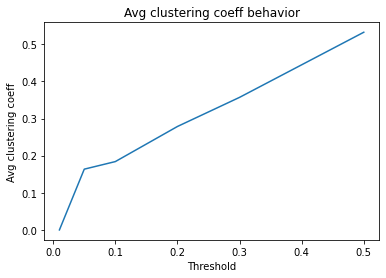

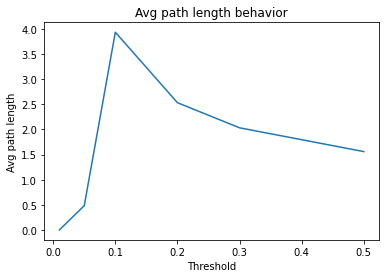

In [89]:
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
open_eyes_gti.plot_global_indices(thresholds)

#### Closed eyes

Computing for t = 0.01
Computing for t = 0.05
Computing for t = 0.1
Computing for t = 0.2
Computing for t = 0.3
Computing for t = 0.5
Time passed: 57 seconds


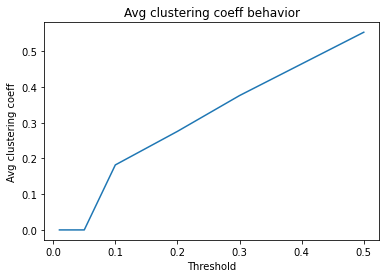

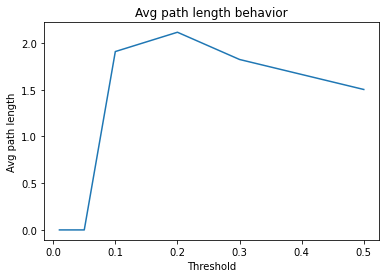

In [90]:
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
closed_eyes_gti.plot_global_indices(thresholds)

### 2.7

(class ‘C’) Perform point 2.1 considering the weighted version of the graph indices definitions.

#### Open eyes

In [26]:
open_eyes_gti.compute_connectivity(freq=10, threshold=0.2)

avg_cl_coef, avg_path_len = open_eyes_gti.compute_global_indices(True)
print("##### BINARY GLOBAL INDICES #####\n")
print("Average Clustering Coefficient: %.3f" % (avg_cl_coef))
print("Average Path Length: %.3f" % (avg_path_len))

degree, in_degree, out_degree = open_eyes_gti.compute_local_indices(True)
print("\n##### BINARY LOCAL INDICES #####\n")
print("Degree (first 10): \t", degree[:10], "\n")
print("In-Degree (first 10): \t", in_degree[:10], "\n")
print("Out-Degree (first 10): \t", out_degree[:10], "\n")

##### BINARY GLOBAL INDICES #####

Average Clustering Coefficient: 0.071
Average Path Length: 0.358

##### BINARY LOCAL INDICES #####

Degree (first 10): 	 [('Af7', 45), ('T7', 43), ('Iz', 42), ('Oz', 41), ('Cp6', 39), ('P4', 38), ('F7', 37), ('C4', 34), ('Cp1', 34), ('Af8', 34)] 

In-Degree (first 10): 	 [('Cp6', 32), ('P4', 30), ('Iz', 30), ('C4', 29), ('Oz', 29), ('P7', 26), ('Cp1', 25), ('C3', 24), ('F2', 23), ('Po3', 23)] 

Out-Degree (first 10): 	 [('T7', 43), ('Af7', 38), ('Af8', 32), ('F7', 30), ('Fp1', 26), ('Fp2', 23), ('F8', 21), ('Fpz', 20), ('Af4', 20), ('F5', 20)] 



#### Closed eyes

In [28]:
closed_eyes_gti.compute_connectivity(freq=10, threshold=0.2, method="DTF")

avg_cl_coef, avg_path_len = closed_eyes_gti.compute_global_indices(True)
print("##### BINARY GLOBAL INDICES #####\n")
print("Average Clustering Coefficient: %.3f" % (avg_cl_coef))
print("Average Path Length: %.3f" % (avg_path_len))

degree, in_degree, out_degree = closed_eyes_gti.compute_local_indices(True)
print("\n##### BINARY LOCAL INDICES #####\n")
print("Degree (first 10): \t", degree[:10], "\n")
print("In-Degree (first 10): \t", in_degree[:10], "\n")
print("Out-Degree (first 10): \t", out_degree[:10], "\n")

##### BINARY GLOBAL INDICES #####

Average Clustering Coefficient: 0.163
Average Path Length: 0.099

##### BINARY LOCAL INDICES #####

Degree (first 10): 	 [('Oz', 73), ('Iz', 71), ('P8', 69), ('Po4', 68), ('C4', 64), ('Poz', 56), ('Fc3', 52), ('P4', 52), ('P6', 52), ('Po8', 48)] 

In-Degree (first 10): 	 [('Oz', 63), ('Iz', 63), ('P8', 61), ('Po4', 61), ('C4', 54), ('Poz', 48), ('P4', 43), ('P6', 43), ('Cp6', 39), ('P7', 39)] 

Out-Degree (first 10): 	 [('Af7', 20), ('Fp1', 19), ('Fpz', 18), ('Fp2', 18), ('Af3', 17), ('Afz', 17), ('F7', 16), ('F5', 16), ('F3', 16), ('Fc5', 15)] 

